In [113]:
import numpy as np
import pandas as pd
import seaborn as sns

pd_pen = sns.load_dataset('penguins')
pd_pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64


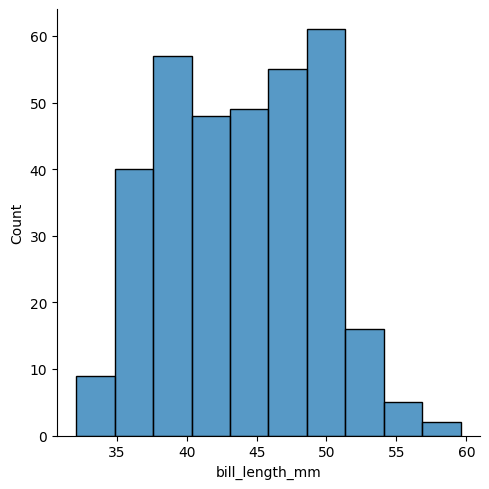

In [114]:
print(pd_pen['bill_length_mm'].describe())

sns.displot(data=pd_pen, x='bill_length_mm', bins=10)  # default : histplot (histogram) / hist

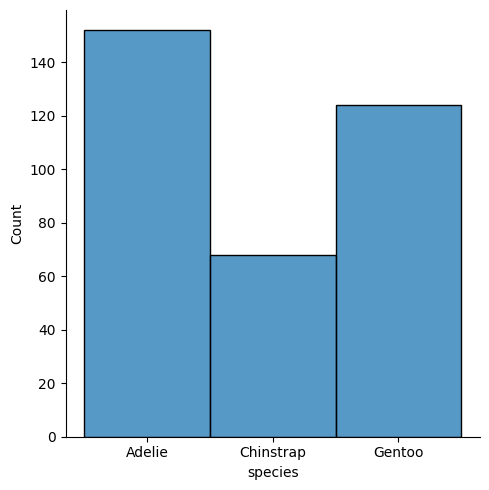

In [115]:
sns.displot(data=pd_pen, x='species')

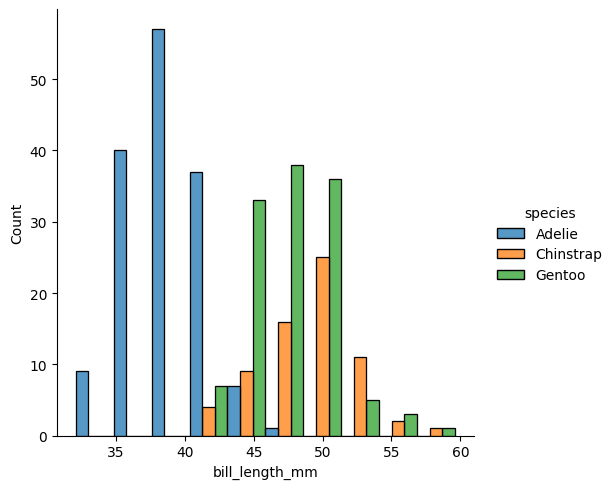

In [116]:
# sns.displot(data=pd_pen, x='bill_length_mm', bins=10, hue='species') 

# legend에 없는 색상은 색상들이 겹쳐져서 나타나는 것
sns.displot(data=pd_pen, x='bill_length_mm', bins=10, hue='species', multiple='dodge')  # multiple='dodge' 중복되는 영역을 모두 구분(즉 겹치지 않고 그릴 경우 해당 옵션 추가)

# sns.displot(data=pd_pen, x='bill_length_mm', bins=10, hue='species', multiple='stack')

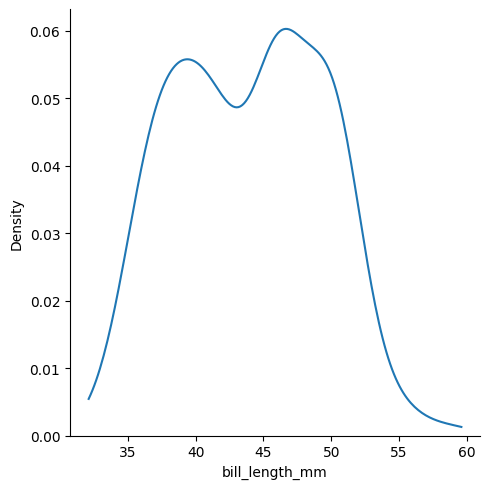

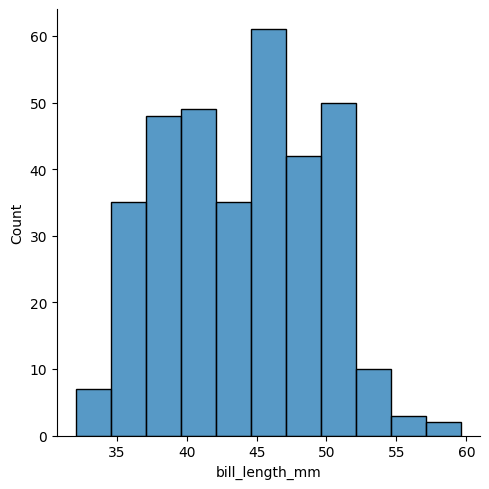

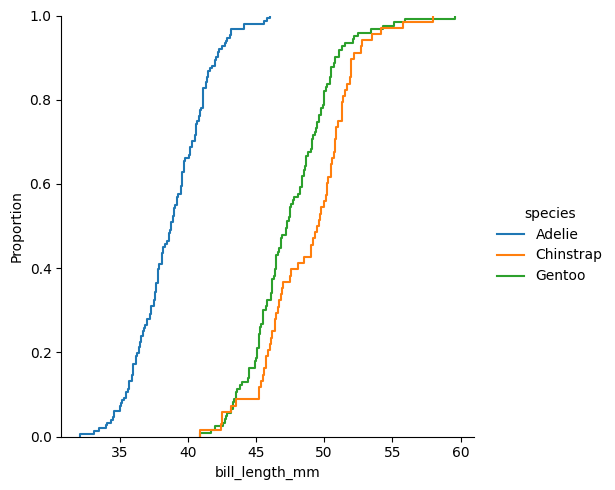

In [117]:
sns.displot(data=pd_pen, x='bill_length_mm', kind='kde', cut=0) # cut : 데이터가 없는 구간에서 그래프가 딱 끊기도록 구성
sns.displot(data=pd_pen, x='bill_length_mm', kind='hist')
sns.displot(data=pd_pen, x='bill_length_mm', kind='ecdf', hue='species') # 값을 누적해서 그림

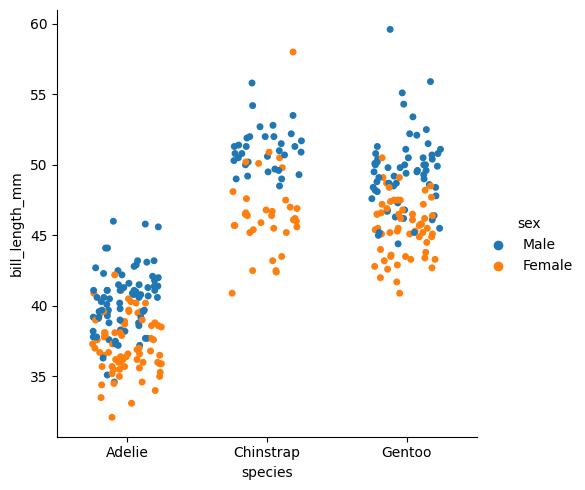

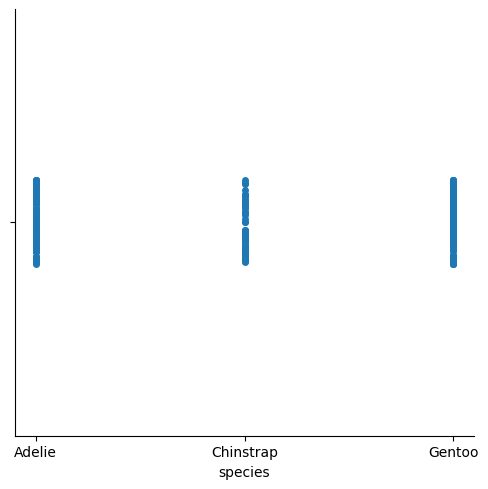

In [118]:
sns.catplot(data=pd_pen, x='species', y='bill_length_mm', jitter=0.25, hue='sex')
sns.catplot(data=pd_pen, x='species')

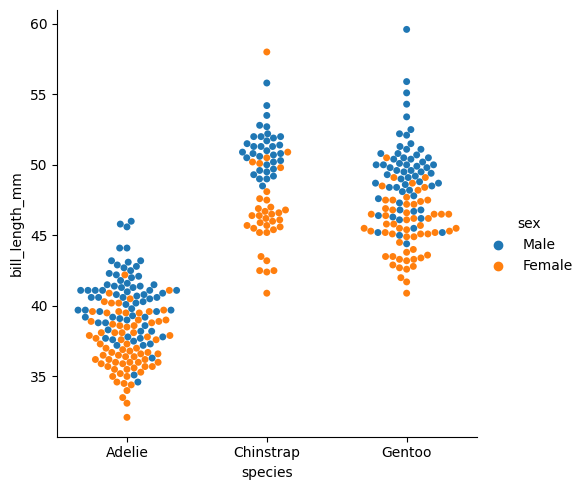

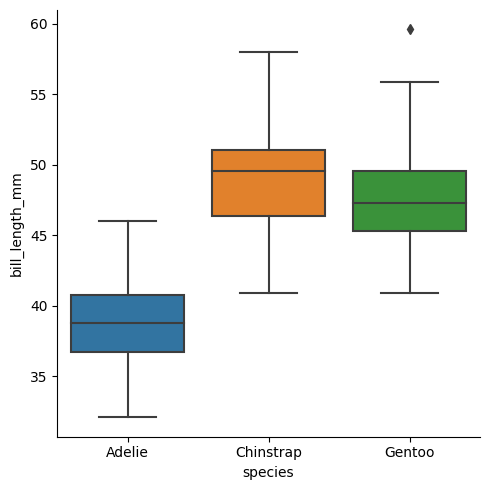

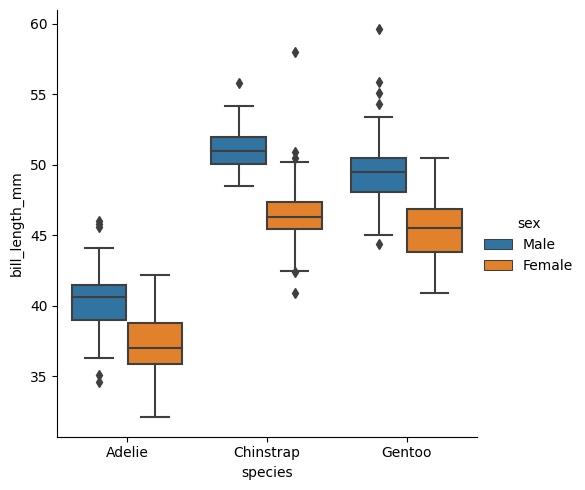

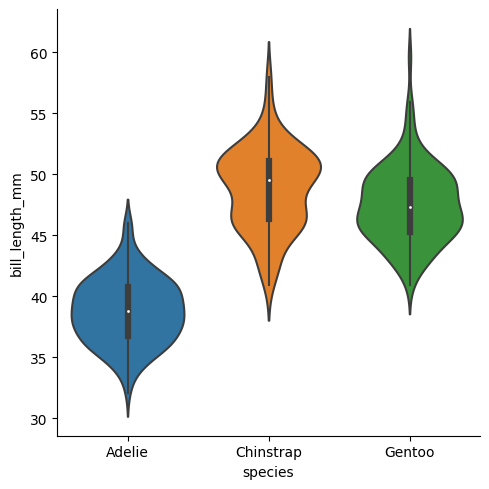

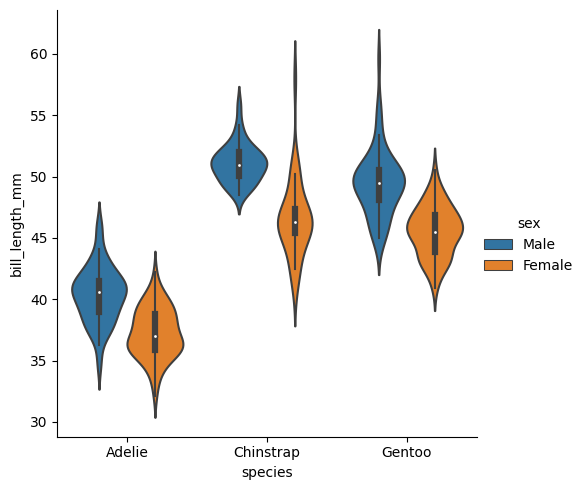

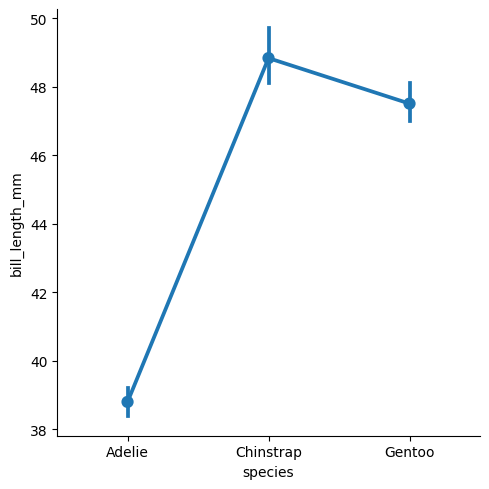

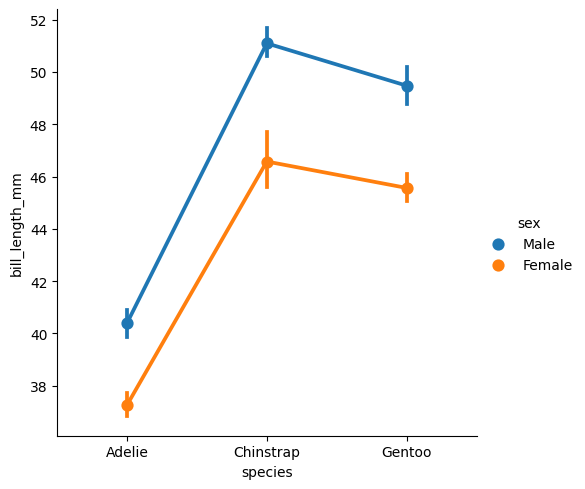

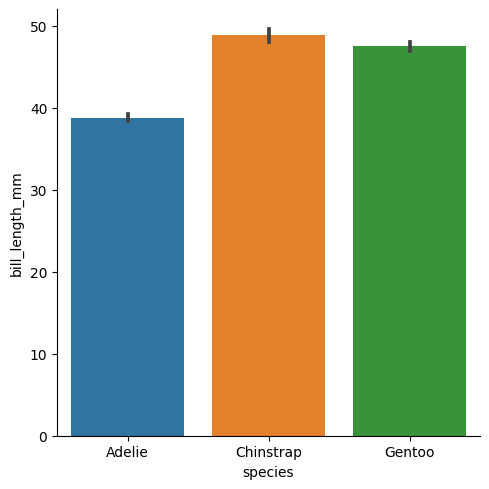

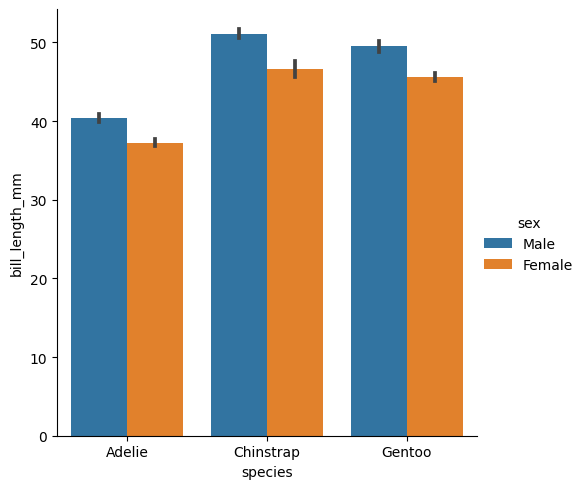

In [119]:
sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='swarm', hue='sex')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='box')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='box', hue='sex')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='violin')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='violin', hue='sex')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='point')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='point', hue='sex')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='bar')

sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='bar', hue='sex')

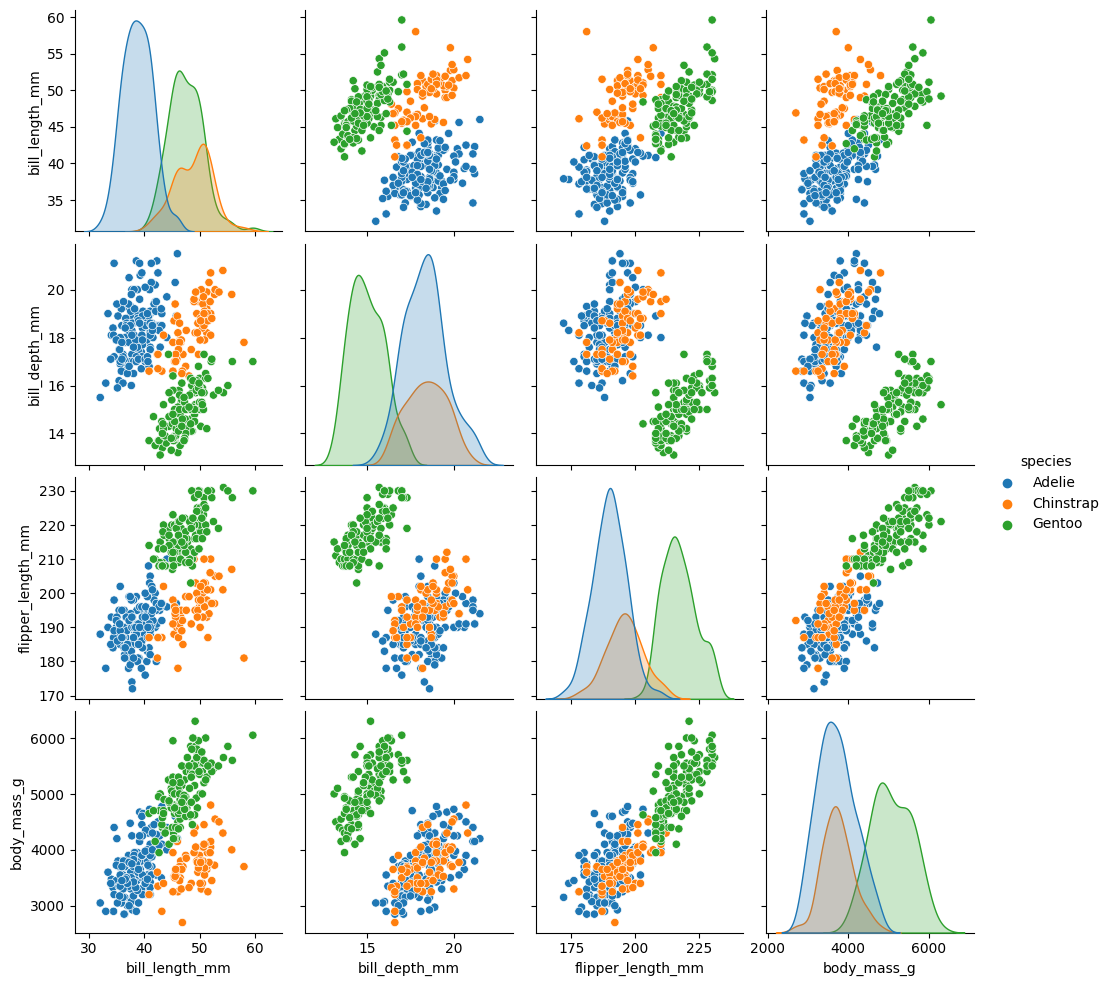

In [120]:
sns.pairplot(data=pd_pen, hue='species')

In [121]:
pd_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


island          Biscoe        Dream    Torgersen
species                                         
Adelie     3709.659091  3688.392857  3706.372549
Chinstrap          NaN  3733.088235          NaN
Gentoo     5076.016260          NaN          NaN


C:\Users\ITPS\AppData\Local\Temp\ipykernel_3340\1943948816.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = g1.mean().reset_index()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_3340\1943948816.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df2 = df1.pivot('species', 'island', 'body_mass_g')


<Axes: xlabel='island', ylabel='species'>

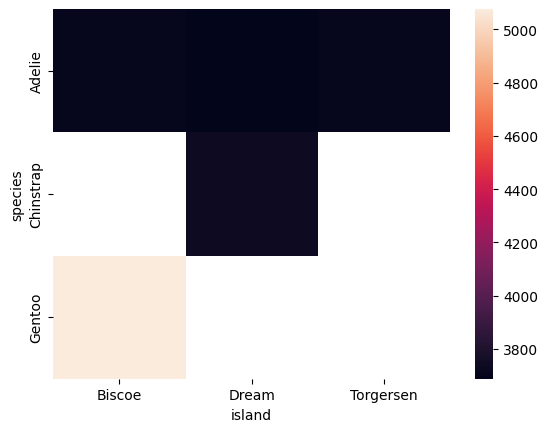

In [122]:
g1 = pd_pen.groupby(['species', 'island'])

df1 = g1.mean().reset_index()

df2 = df1.pivot('species', 'island', 'body_mass_g')

print(df2)
sns.heatmap(data=df2)


island     Biscoe  Dream  Torgersen
species                            
Adelie       44.0   56.0       51.0
Chinstrap     0.0   68.0        0.0
Gentoo      123.0    0.0        0.0


C:\Users\ITPS\AppData\Local\Temp\ipykernel_3340\2971081775.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df6 = df5.pivot('species', 'island', 'body_mass_g').fillna(0.0)


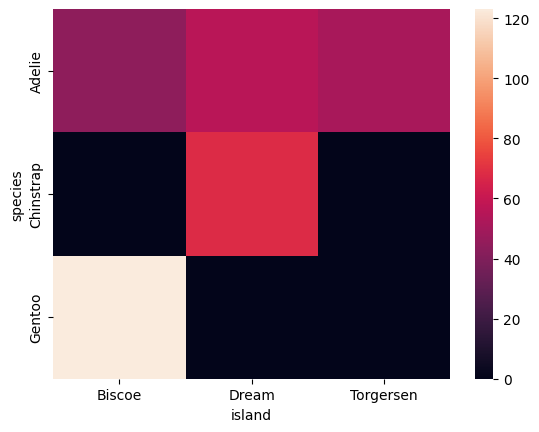

In [128]:
# pd_pen.pivot('species', 'island', 'body_mass_g')

g1 = pd_pen.groupby(['species', 'island'])
df5 = g1.count().reset_index()
df6 = df5.pivot('species', 'island', 'body_mass_g').fillna(0.0)

sns.heatmap(data=df6)

print(df6)

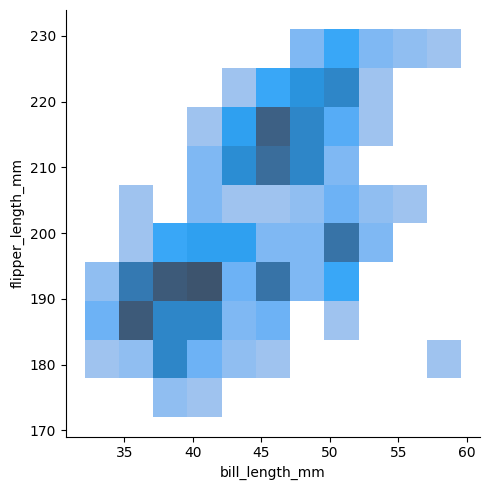

In [133]:
sns.displot(data=pd_pen, x='bill_length_mm', y='flipper_length_mm')   # 히스토그램의 겹치는 빈도를 표현

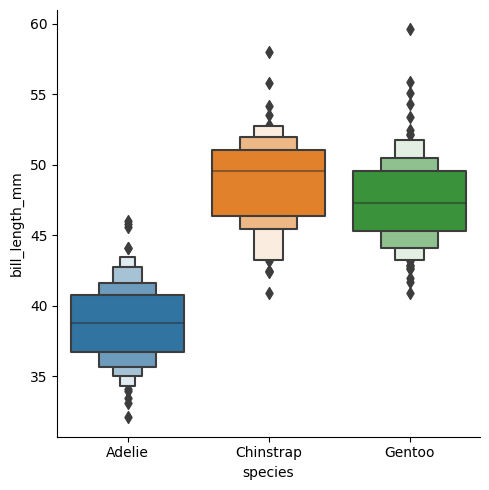

In [134]:
sns.catplot(data=pd_pen, x='species', y='bill_length_mm', kind='boxen')